In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction
For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file. 

This notebook shows how to composite two data sources together into a single dataset using `popac.compositor.OrderedCompositor`. This is useful when:
* You have two datasources that have different coverages and resolutions
* Your datasource is stored in multiple files (tiled)

The `podpac.datalib.SMAP` node is an example of a compositor. 

# Example of two datasources with different coverage

In [2]:
import podpac
from podpac import crange

## Create raster data sources

In [3]:
# Create high resolution datasource with limited coverage
high_res = podpac.data.Array(source=np.linspace(0., 1., 101*81).reshape(101, 81),
                             native_coordinates=podpac.Coordinates([crange(-25, 25, 0.5, 'lat'),
                                                                    crange(-20, 20, 0.5, 'lon')])
                            )
# Add a few nans to the high resolution source
high_res.source[40:60, 40:60] = np.nan

# Create lower resolution datasource with larger coverage
low_res =  podpac.data.Array(source=np.random.rand(21, 16),
                             native_coordinates=podpac.Coordinates([crange(-40, 40, 4.0, 'lat'),
                                                                    crange(-30, 30, 4.0, 'lon')]),
                            )

## Visualize raster data

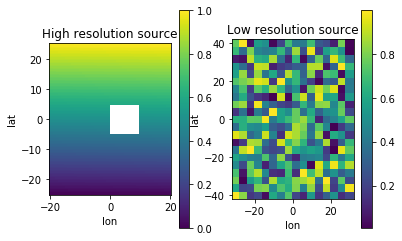

In [4]:
# Plot data
subplot(121)
high_res.eval(high_res.native_coordinates).plot()
title("High resolution source"); axis('scaled')
subplot(122)
low_res.eval(low_res.native_coordinates).plot()
title("Low resolution source"); _ = axis('scaled')

# Composite the two data sources together

In [5]:
composite = podpac.compositor.OrderedCompositor(
    sources=np.array([high_res,  # Takes priority
                      low_res]), 
    interpolation='bilinear'
)

# Evaluate compsitor at arbitrary raster grid

(-30.25, 30.25, -40.25, 40.25)

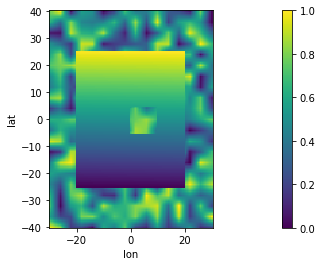

In [6]:
# Create coordinates
coords = podpac.Coordinates([crange(-40, 40, 0.5, 'lat'),
                             crange(-30, 30, 0.5, 'lon')])

# Evaluate node
o = composite.eval(coords)

# Plot
figure(); o.plot(); axis('scaled')